In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
import numpy as np

## 图像平滑、模糊处理

> 消除图像中的噪声成分叫作图像的平滑化或滤波操作

“平滑处理“（smoothing）也称“模糊处理”（bluring），使用频率很高的图像处理方法。平滑处理的用途有很多，最常见的是用来减少图像上的噪点或者失真。在涉及到降低图像分辨率时，平滑处理是非常好用的方法。

https://docs.opencv.org/3.4.2/d4/d13/tutorial_py_filtering.html#gsc.tab=0

使用低通滤波器可以达到图像模糊的目的。这对与去除噪音很有帮助。其实就是去除图像中的高频成分（比如：噪音，边界）。所以边界也会被模糊一点。

OpenCV 提供了四种模糊技术：

1. 图像均值平滑滤波 cv2.blur()

    * 均值滤波是典型的线性滤波算法，它是指在图像上对目标像素给一个模板，该模板包括了其周围的临近像素（以目标象素为中心的周围8个像素，构成一个滤波模板，即去掉目标像素本身），再用模板中的全体像素的平均值来代替原来像素值。平均是由一个归一化卷积框完成的。只是用卷积框覆盖区域所有像素的平均值来代替中心元素。
    *均值滤波本身存在着固有的缺陷，即它不能很好地保护图像细节，在图像去噪的同时也破坏了图像的细节部分，从而使图像变得模糊，不能很好地去除噪声点。*

     > dst = cv.blur(src, ksize[, dst[, anchor[, borderType]]])
     
     * src：图像矩阵
     * ksize：滤波窗口尺寸
     
     ```
     src input image; it can have any number of channels, which are processed independently, 
     but the depth  should be CV_8U, CV_16U, CV_16S, CV_32F or CV_64F.
     dst	output image of the same size and type as src.
     ksize	blurring kernel size.
     anchor	anchor point; default value Point(-1,-1) means that the anchor is at the kernel center.
     borderType	border mode used to extrapolate pixels outside of the image, see BorderTypes
     ```
     
2. 高斯滤波 cv2.GaussianBlur() 

    * 高斯滤波是一种线性平滑滤波，适用于消除高斯噪声，高斯滤波就是对整幅图像进行加权平均的过程，每一个像素点的值，都由其本身和邻域内的其他像素值经过加权平均后得到。高斯滤波的具体操作是：用一个模板（或称卷积、掩模）扫描图像中的每一个像素，用模板确定的邻域内像素的加权平均灰度值去替代模板中心像素点的值。 
    * 高斯滤波后图像被平滑的程度取决于标准差。它的输出是领域像素的加权平均，同时离中心越近的像素权重越高。因此，相对于均值滤波（mean filter）它的平滑效果更柔和，而且边缘保留的也更好。
    **高斯矩阵的尺寸越大，标准差越大，处理过的图像模糊程度越大。**
    
    > dst = cv.GaussianBlur(src, ksize, sigmaX[, dst[, sigmaY[, borderType]]])
    
    * src: 图像矩阵
    * ksize: 滤波窗口尺寸
    * sigmax: 标准差

    
| parameter | desc |
| :----:  | ---- |
|src|	input image; the image can have any number of channels, which are processed independently, but the depth should be CV_8U, CV_16U, CV_16S, CV_32F or CV_64F.|
|dst	|output image of the same size and type as src.|
|ksize|	Gaussian kernel size. ksize.width and ksize.height can differ but they both must be positive and odd. Or, they can be zero's and then they are computed from sigma.|
|sigmaX	|Gaussian kernel standard deviation in X direction.|
|sigmaY	|Gaussian kernel standard deviation in Y direction; if sigmaY is zero, it is set to be equal to sigmaX, if both sigmas are zeros, they are computed from ksize.width and ksize.height, respectively (see getGaussianKernel for details); to fully control the result regardless of possible future modifications of all this semantics, it is recommended to specify all of ksize, sigmaX, and sigmaY.|
|borderType	|pixel extrapolation method, see BorderTypes|
   
   
   > 实现的函数是 cv2.GaussianBlur()。我们需要指定高斯核的宽和高（必须是奇数）。以及高斯函数沿 X，Y 方向的标准差。如果我们只指定了 X 方向的的标准差，Y 方向也会取相同值。如果两个标准差都是 0，那么函数会根据核函数的大小自己计算。高斯滤波可以有效的从图像中去除高斯噪音。


3. 中值滤波 cv2.medianBlur()

    * 中值滤波法是一种非线性平滑技术，它将每一像素点的灰度值设置为该点某邻域窗口内的所有像素点灰度值的中值。
    * 中值滤波是基于排序统计理论的一种能有效抑制噪声的非线性信号处理技术，中值滤波的基本原理是把数字图像或数字序列中一点的值用该点的一个邻域中各点值的中值代替，让周围的像素值接近的真实值，从而消除孤立的噪声点。
    * 方法是用某种结构的二维滑动模板，将板内像素按照像素值的大小进行排序，生成单调上升（或下降）的为二维数据序列。二维中值滤波输出为g（x,y）=med{f(x-k,y-l),(k,l∈W)} ，其中，f(x,y)，g(x,y)分别为原始图像和处理后图像。W为二维模板，通常为3*3，5*5区域，也可以是不同的的形状，如线状，圆形，十字形，圆环形等。
    
    > dst =	cv.medianBlur(src, ksize[, dst]	)
    
    * src：图像矩阵
    * ksize：滤波窗口尺寸
    ```
    src	input 1-, 3-, or 4-channel image; when ksize is 3 or 5, the image depth 
            should be CV_8U, CV_16U, or CV_32F, for larger aperture sizes, it can only be CV_8U.
    dst	destination array of the same size and type as src.
    ksize	aperture linear size; it must be odd and greater than 1, for example: 3, 5, 7 ...
    ```
    
    * 用与卷积框对应像素的中值来替代中心像素的值。这个滤波器经常用来**去除椒盐噪声**。前面的滤波器都是用计算得到的一个新值来取代中心像素的值，而中值滤波是用中心像素周围（也可以使他本身）的值来取代他。他能有效的去除噪声。**卷积核的大小也应该是一个奇数。**
    * 虽然ksize（模板大小为ksize * ksize）越大可以有效的消除噪声，但是会使边界模糊，因此对ksize的选择直接影响图片的质量。
    
   
4. 双边滤波 cv2.bilateralFilter()

    * 双边滤波（Bilateral filter）是一种非线性的滤波方法，是结合图像的空间邻近度和像素值相似度的一种折衷处理，同时考虑空域信息和灰度相似性，达到*保边去噪*的目的。具有简单、非迭代、局部的特点。 
    * 双边滤波器的好处是可以做边缘保存（edge preserving），一般过去用的维纳滤波或者高斯滤波去降噪，都会较明显地模糊边缘，对于高频细节的保护效果并不明显。**双边滤波器顾名思义比高斯滤波多了一个高斯方差sigma－d**，它是基于空间分布的高斯滤波函数，所以在边缘附近，离的较远的像素不会太多影响到边缘上的像素值，这样就保证了边缘附近像素值的保存。但是由于保存了过多的高频信息，对于彩色图像里的高频噪声，双边滤波器不能够干净的滤掉，只能够对于低频信息进行较好的滤波。
    
        * 高斯滤波器只考虑像素之间的空 间关系，而不会考虑像素值之间的关系（像素的相似度）。所以这种方法不会考虑一个像素是否位于边界。因此边界也会别模糊掉，而这正不是我们想要
        *  双边滤波在同时使用空间高斯权重和灰度值相似性高斯权重。空间高斯函 数确保只有邻近区域的像素对中心点有影响，灰度值相似性高斯函数确保只有与中心像素灰度值相近的才会被用来做模糊运算。所以这种方法会确保边界不会被模糊掉，因为边界处的灰度值变化比较大
    
    
    > dst =	cv.bilateralFilter(src, d, sigmaColor, sigmaSpace[, dst[, borderType]])
    
    * src：图像矩阵
    * d：邻域直径
    * sigmaColor：颜色标准差
    * sigmaSpace：空间标准差
    
    ``` 
    src	Source 8-bit or floating-point, 1-channel or 3-channel image.
    dst	Destination image of the same size and type as src .
    d	Diameter of each pixel neighborhood that is used during filtering. If it is non-positive, it is computed from sigmaSpace.
    sigmaColor	Filter sigma in the color space. A larger value of the parameter means that farther colors within the pixel neighborhood (see sigmaSpace) will be mixed together, resulting in larger areas of semi-equal color.
    sigmaSpace	Filter sigma in the coordinate space. A larger value of the parameter means that farther pixels will influence each other as long as their colors are close enough (see sigmaColor ). When d>0, it specifies the neighborhood size regardless of sigmaSpace. Otherwise, d is proportional to sigmaSpace.
    borderType	border mode used to extrapolate pixels outside of the image, see BorderTypes
    ```   
    
 * 函数 cv2.bilateralFilter() 能在保持边界清晰的情况下有效的去除噪音。但是这种操作与其他滤波器相比会比较慢。我们已经知道高斯滤波器是求中心点邻近区域像素的高斯加权平均值。这种高斯滤波器只考虑像素之间的空间关系，而不会考虑像素值之间的关系（像素的相似度）。所以这种方法不会考虑一个像素是否位于边界。因此边界也会别模糊掉，而这正不是我们想要。双边滤波在同时使用空间高斯权重和灰度值相似性高斯权重。空间高斯函数确保只有邻近区域的像素对中心点有影响，灰度值相似性高斯函数确保只有与中心像素灰度值相近的才会被用来做模糊运算。所以这种方法会确保边界不会被模糊掉，因为边界处的灰度值变化比较大。


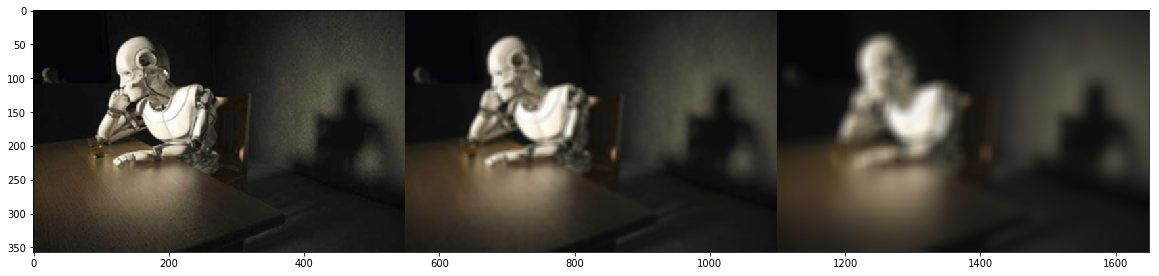

In [33]:
# 均值平滑/滤波
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
import numpy as np

img = cv2.imread('ai.jpg')

# 用 np.hstack，将多个 均值平滑处理后的图像水平合并起来
blured = np.hstack([
        cv2.blur(img, (3,3)),
#         cv2.blur(img, (5,5)),
        cv2.blur(img, (7,7)),
        cv2.blur(img, (19,19))
    ])

plt.figure(figsize=(20, 8))

plt.imshow(blured[:,:,::-1])
# cv2.imwrite('blured.jpg', blured)
plt.show()

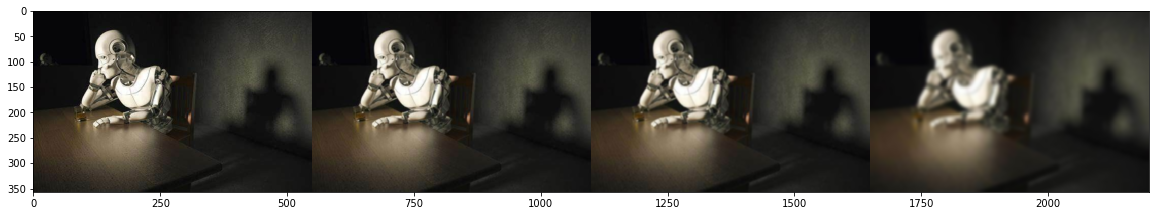

In [35]:
# 高斯模糊 滤波
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
import numpy as np

img = cv2.imread('ai.jpg')

# 用 np.hstack，将多个 均值平滑处理后的图像水平合并起来
blured = np.hstack([
        # img, kernel, std
        cv2.GaussianBlur(img, (3,3), 0),
        cv2.GaussianBlur(img, (5,5), 0),
        cv2.GaussianBlur(img, (7,7), 0),
        cv2.GaussianBlur(img, (19,19), 0)
    ])

plt.figure(figsize=(20, 8))

plt.imshow(blured[:,:,::-1])
plt.show()

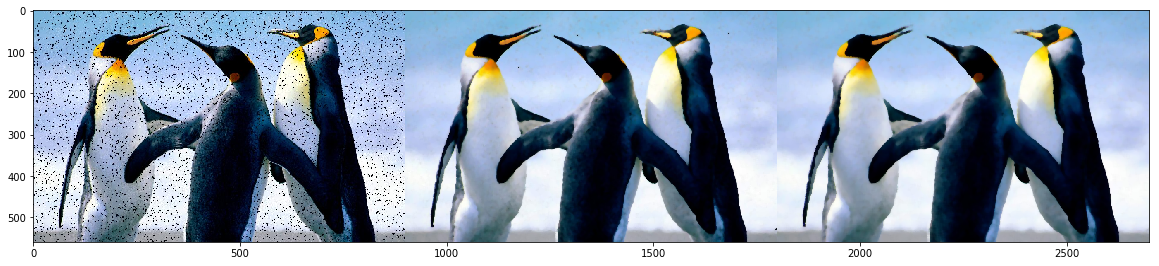

In [36]:
# 均值滤波 去除椒盐噪声
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
import numpy as np

img = cv2.imread('salt_pepper.jpg')

# 用 np.hstack，将多个 均值平滑处理后的图像水平合并起来
blured = np.hstack([
        # img, kernel, std
        cv2.medianBlur(img, 1),
        cv2.medianBlur(img, 7),
        cv2.medianBlur(img, 9)
    ])

plt.figure(figsize=(20, 8))

plt.imshow(blured[:,:,::-1])
plt.show()

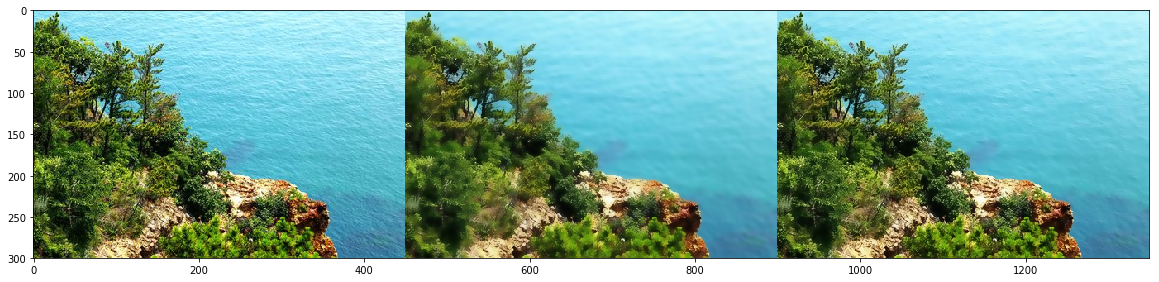

In [48]:
# 双边滤波
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
import numpy as np

img = cv2.imread('nature.jpg')

# 用 np.hstack，将多个 均值平滑处理后的图像水平合并起来
blured = np.hstack([
#         img,
        # 9 邻域直径，两个 10 分别是空间高斯函数标准差，灰度值相似性高斯函数标准差
        cv2.bilateralFilter(img, 9, 5, 5),
        cv2.bilateralFilter(img, 9, 100, 150),
        cv2.bilateralFilter(img, 9, 50, 50)
    ])

plt.figure(figsize=(20, 10))

plt.imshow(blured[:,:,::-1])
plt.show()

### 加盐操作

#### 椒盐噪声和中值滤波 
椒盐噪声（salt-and-pepper noise）是由图像传感器，传输信道，解码处理等产生的黑白相间的亮暗点噪声。

所谓椒盐，椒就是黑，盐就是白，椒盐噪声就是在图像上随机出现黑色白色的像素。椒盐噪声是一种因为信号脉冲强度引起的噪声，产生该噪声的算法也比较简单。

椒盐噪声往往由图像切割引起，去除脉冲干扰及椒盐噪声最常用的算法是中值滤波。大量的实验研究发现，由摄像机拍摄得到的图像受离散的脉冲、椒盐噪声和零均值的高斯噪声的影响较严重。噪声给图像处理带来很多困难，对图像分割、特征提取、图像识别等具有直接影响。因此，实时采集的图像需进行滤波处理。消除图像中的噪声成份叫做图像的平滑化或滤波操作。滤波的目的有两个：一是抽出对象的特征作为图像识别的特征模式；二是为适应计算机处理的要求，消除图像数字化时所混入的噪声。对滤波处理的要求有两条：一是不能损坏图像轮廓及边缘等重要信息；二是使图像清晰，视觉效果好。

我们使用信噪比（Signal NoiseRate）衡量图像噪声，图象的信噪比应该等于信号与噪声的功率谱之比，但通常功率谱难以计算，有一种方法可以近似估计图象信噪比，即信号与噪声的方差之比（其实在均值为零的情况下，功率就是方差）。首先计算图象所有像素的局部方差，将局部方差的最大值认为是信号方差，最小值是噪声方差，求出它们的比值，再转成dB数，最后用经验公式修正。 

如果是灰度图像的话，SNR=（洁净图片中的像素点的灰度值之和）/abs（噪声图片的灰度值之和-洁净图片中的灰度值之和）为该图像的信噪比。 



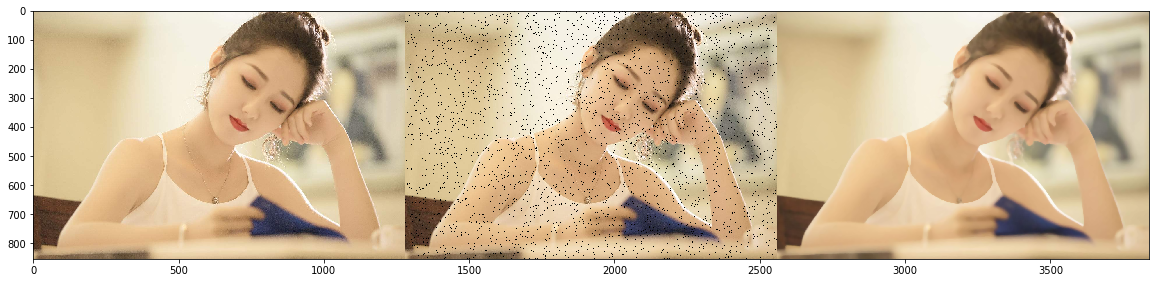

In [32]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
import numpy as np
from copy import deepcopy


filename = "person.jpg"
winname = "figure"
img = cv2.imread(filename)

def add_salt_noise(img, snr=0.5):
    # 指定信噪比
    SNR = snr
    # 获取总共像素个数
    size = img.size
    # 因为信噪比是 SNR ，所以噪声占据百分之10，所以需要对这百分之10加噪声
    noiseSize = int(size * (1 - SNR))
    # 对这些点加噪声
    for k in range(0, noiseSize):
        # 随机获取 某个点
        xi = int(np.random.uniform(0, img.shape[1]))
        xj = int(np.random.uniform(0, img.shape[0]))
        # 增加噪声
        if img.ndim == 2:
            img[xj, xi] = 255
        elif img.ndim == 3:
            img[xj, xi] = 0
    return img

img_demo = deepcopy(img)
img_salt = add_salt_noise(img_demo, snr=0.99)
img_medianblur = cv2.medianBlur(img, 11)

img_all = np.hstack([
    img, img_salt, img_medianblur
])

plt.figure(figsize=(20,10))
plt.imshow(img_all[:,:,::-1])
plt.show()